## Importing Needed Libraries:

In [22]:
# Data Analysis and Wranglin
import pandas as pd
import numpy as np
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### 1. Acquire Data:

In [2]:
df = pd.read_csv("C:/Users/Titan Rafi/Dropbox/PC/Desktop/ML Projects - Self/covid.csv")
df.head()

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
0,Andaman and Nicobar,10742,1,10612,129,313284,320383,236936,53427,991263,426251
1,Andhra Pradesh,2339067,3,2324331,14733,40643161,43549055,11703273,6579565,110556756,52883163
2,Arunachal Pradesh,66890,0,66594,296,860442,747177,72403,58618,1911760,1528296
3,Assam,746100,0,738065,8035,22549957,20561790,2082670,1259853,50284713,34586234
4,Bihar,851379,15,839062,12302,62944633,59144387,11983504,3868082,157197041,119461013


### 2. Analyze by Describing Data:

In [3]:
# Features that are available in the dataset
print(df.columns.values)

['state' 'confirmed' 'active' 'passive' 'deaths' 'dose1' 'dose2' 'dose3'
 'precaution_dose' 'total_doses' 'population']


### Categorical features are
• Our data is statewise so has no categorical features.so Categorical Values: None
### Numerical feature are
• Continous Values: confirmed, active, passive, deaths, dose1, dose2,
dose3, precaution_dose,
total_doses, population

In [23]:
# Preview the data
df.head().T

,0,1,2,3,4
state,Andaman and Nicobar,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar
confirmed,10742,2339067,66890,746100,851379
active,1,3,0,0,15
passive,10612,2324331,66594,738065,839062
deaths,129,14733,296,8035,12302
dose1,313284,40643161,860442,22549957,62944633
dose2,320383,43549055,747177,20561790,59144387
dose3,236936,11703273,72403,2082670,11983504
precaution_dose,53427,6579565,58618,1259853,3868082
total_doses,991263,110556756,1911760,50284713,157197041


### What are the Data types for Various Features?
• 10 features are integer
• 1 feature is string(object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            36 non-null     object
 1   confirmed        36 non-null     int64 
 2   active           36 non-null     int64 
 3   passive          36 non-null     int64 
 4   deaths           36 non-null     int64 
 5   dose1            36 non-null     int64 
 6   dose2            36 non-null     int64 
 7   dose3            36 non-null     int64 
 8   precaution_dose  36 non-null     int64 
 9   total_doses      36 non-null     int64 
 10  population       36 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.2+ KB


### Assumptions Based on the Data Analysis

1. following assumptions based on the data analysis done So far.

### Correlating:

1. We want to know how well does each feature correlate with Deaths.

### Completing:

1. We may want to complete the dose feature as it is definitely correlated with death.
2. We may want to complete the active feature as it my also correlate with death.

### Correcting:

1. State Feature is Relatively Non-Standard, may not Contribute Directly to Deaths, so maybe Droped.

### Creating:

1. We may want to create a new feature called real_total_dose based on the dose1,
dose2, dose3,precaution_dose to get the total count of all 3 doses.

### Classifying:

We may also add to our assumptions based on the probelm description noted earlier
1. Population Range of State.
2. Total_Doses
3. Active Cases in Each State

### 3. Analyze by Pivoting Features:
To Confirm Some of Our Observations and Assumption,
We can Analyze Our Feature Correlation by Pivoting Features Against Each Other.

In [7]:
# Relationship Between Death and State
data = pd.DataFrame()
data['deaths'] = df.sort_values('deaths',ascending=False).deaths.values[:10]
data['state'] = df.sort_values('deaths',ascending=False).state.values[:10]

In [29]:
# Relationship Between Death and Population
population = pd.DataFrame()
population['population'] = df.sort_values('population',
                                          ascending=False).population.values[:10]
population['state'] = df.sort_values('population',
                                     ascending=False).state.values[:10]

In [30]:
cases = pd.DataFrame()
cases['state'] = df.sort_values(by='confirmed',
                                ascending=False).state.values[:10]
cases['case1'] = df.sort_values(by='confirmed',
                                ascending=False).confirmed.values[:10]

In [32]:
dose = pd.DataFrame()
dose['total_dose'] = df['dose1'] + df['dose2'] + df['dose3'] + df['precaution_dose']
df[['dose1','dose2','dose3','precaution_dose','total_doses','deaths']].corr()

,dose1,dose2,dose3,precaution_dose,total_doses,deaths
dose1,1.000000,0.997478,0.886536,0.913766,0.995872,0.501551
dose2,0.997478,1.000000,0.908188,0.930180,0.998916,0.461720
dose3,0.886536,0.908188,1.000000,0.897297,0.922680,0.157094
precaution_dose,0.913766,0.930180,0.897297,1.000000,0.928383,0.403252
total_doses,0.995872,0.998916,0.922680,0.928383,1.000000,0.439675
deaths,0.501551,0.461720,0.157094,0.403252,0.439675,1.000000


### 4. Analyze by Visualizing Data:
Now We can Continue Confirming Some of our Assumptions using Visualization for Analyzing the Data

<Figure size 1008x576 with 0 Axes>

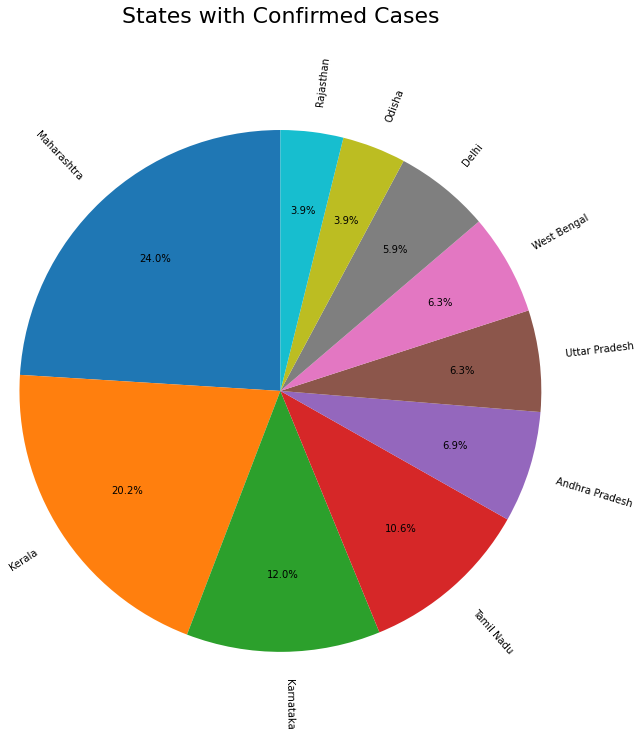

In [25]:
# Top 10 States Having the Confirmed Cases
case1,state = cases['case1'],cases['state']
plt.figure(figsize=(14,8))
fig,ax2 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("States with Confirmed Cases",fontdict=title,pad=260)
ax2.pie(case1,labels=state,radius=3,autopct='%1.1f%%',
        pctdistance=.7,rotatelabels=30,startangle=90)
plt.show()

<Figure size 1008x576 with 0 Axes>

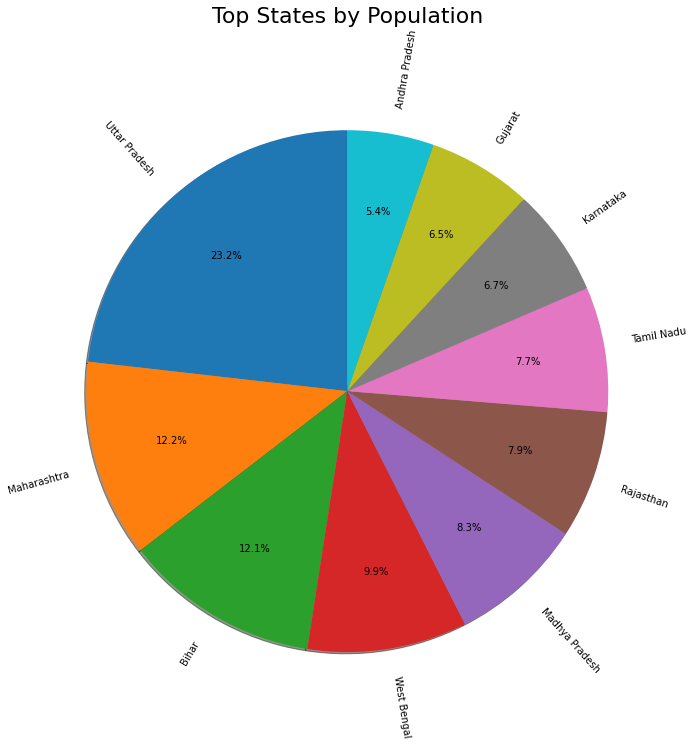

In [24]:
# Top 10 States Having the Higest Population
states,values = population['state'],population['population']
plt.figure(figsize=(14,8))
fig,ax1 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("Top States by Population",fontdict=title,pad=260)
ax1.pie(values,labels=states,autopct='%1.1f%%',pctdistance=.7,
        rotatelabels=40,shadow=True,radius=3,startangle=90)
plt.show()

<Figure size 1008x576 with 0 Axes>

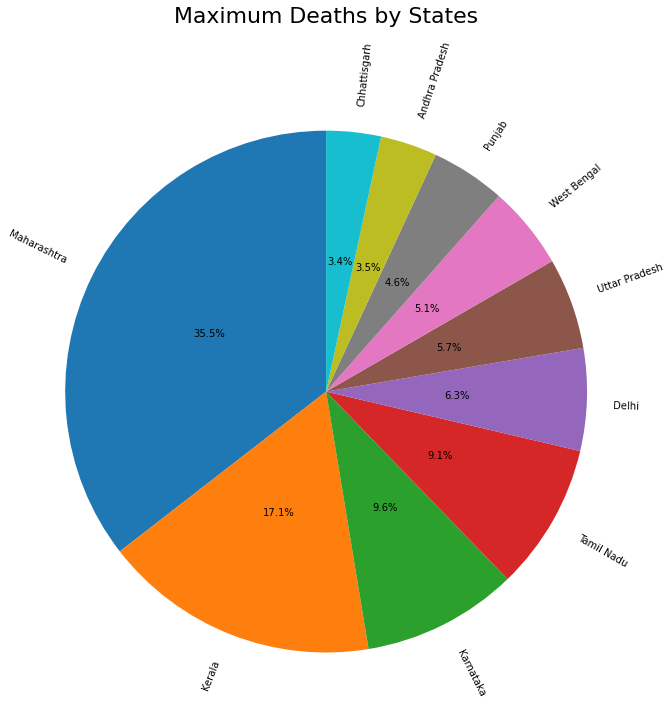

In [26]:
# Top 10 States Having the Higest Death Count
deaths,state=data['deaths'],data['state']
plt.figure(figsize=(14,8))
fig,ax3 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("Maximum Deaths by States",fontdict=title,pad=260)
ax3.pie(deaths,labels=state,radius=3,autopct='%1.1f%%',
        pctdistance=.5,counterclock=True,rotatelabels=30,startangle=90)
plt.show()

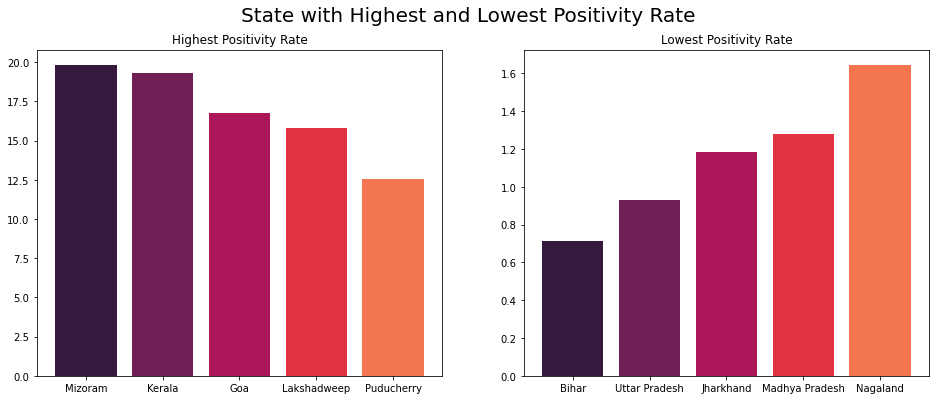

In [27]:
# Which States have Highest and lowest Postivity Rate
df['Positivity rate'] = df['confirmed']*100/df['population']
states_pos_high = df.sort_values(by='Positivity rate',
                                 ascending=False)['state'].values[:5]
states_pos_least = df.sort_values(by='Positivity rate',
                                  ascending=True)['state'].values[:5]
high_PR = []
low_PR = []
for i,a in zip(states_pos_high,states_pos_least):
    high_PR.append(df[df['state'] == str(i)]['Positivity rate'].values[0])
    low_PR.append(df[df['state'] == str(a)]['Positivity rate'].values[0])
# chart
fig,ax4 = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
fig.suptitle("State with Highest and Lowest Positivity Rate",
             fontsize=20)
ax4[0].set_title("Highest Positivity Rate")
ax4[1].set_title("Lowest Positivity Rate")
colr = sns.color_palette('rocket')
ax4[1].bar(states_pos_least,low_PR,color=colr)
ax4[0].bar(states_pos_high,high_PR,color=colr)
plt.show()

C:\Users\Titan Rafi\AppData\Local\Temp\ipykernel_1916\2090055847.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4[0].set_xticklabels(states_death_high,rotation=90)
C:\Users\Titan Rafi\AppData\Local\Temp\ipykernel_1916\2090055847.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4[1].set_xticklabels(states_death_least,rotation=90)


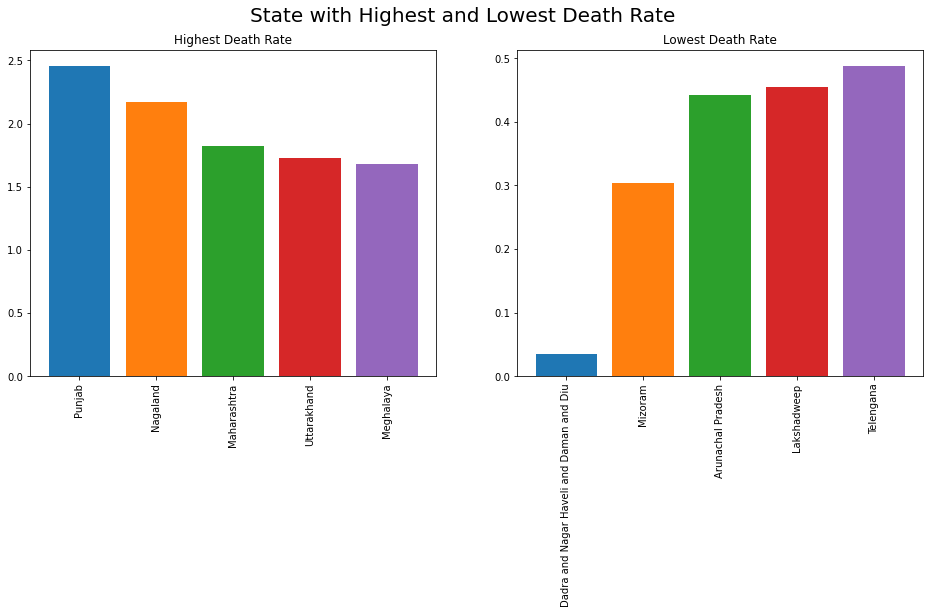

In [28]:
# Which States Have Highest and lowest Death Rate
df['Death rate'] = df['deaths']*100/df['confirmed']
states_death_high = df.sort_values(by='Death rate',
                                   ascending=False)['state'].values[:5]
states_death_least = df.sort_values(by='Death rate',
                                    ascending=True)['state'].values[:5]
high_DR = []
low_DR = []
for i,a in zip(states_death_high,states_death_least):
    high_DR.append(df[df['state'] == str(i)]['Death rate'].values[0])
    low_DR.append(df[df['state'] == str(a)]['Death rate'].values[0])
# Chart
fig,ax4 = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
fig.suptitle("State with Highest and Lowest Death Rate",
             fontsize=20)
ax4[0].set_title("Highest Death Rate")
ax4[1].set_title("Lowest Death Rate")
colr = sns.color_palette('tab10')
ax4[0].bar(states_death_high,high_DR,color=colr)
ax4[0].set_xticklabels(states_death_high,rotation=90)
ax4[1].set_xticklabels(states_death_least,rotation=90)
ax4[1].bar(states_death_least,low_DR,color=colr)
plt.show()

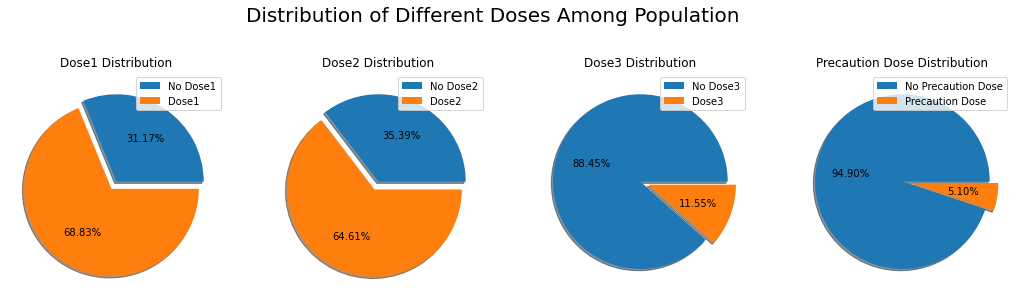

In [18]:
 # Population vaccinated according to the doses
pop = df.sum()['population']
dose1 = df.sum()['dose1']
dose2 = df.sum()['dose2']
dose3 = df.sum()['dose3']
dose4 = df.sum()['precaution_dose']
fig, ax1 = plt.subplots(1,4,figsize=(18,5.1))
fig.suptitle("Distribution of Different Doses Among Population",fontsize=20)
ax1[0].pie(x=[pop - dose1,dose1],shadow=True,autopct='%1.2f%%',explode=(0,0.1))
ax1[0].set_title('Dose1 Distribution')
ax1[0].legend(['No Dose1','Dose1'],loc=1)
ax1[1].pie(x=[pop - dose2,dose2],autopct='%1.2f%%',shadow=True,explode=(0,0.1))
ax1[1].set_title('Dose2 Distribution')
ax1[1].legend(['No Dose2','Dose2'])
ax1[2].pie(x=[pop - dose3,dose3],autopct='%1.2f%%',explode=(0,0.1),shadow=True)
ax1[2].set_title('Dose3 Distribution')
ax1[2].legend(['No Dose3','Dose3'],loc=0)
ax1[3].pie(x=[pop - dose4,dose4],autopct='%1.2f%%',explode=(0,0.1),shadow=True)
ax1[3].set_title('Precaution Dose Distribution')
ax1[3].legend(['No Precaution Dose','Precaution Dose'],loc=0)
plt.show()

C:\Users\Titan Rafi\AppData\Local\Temp\ipykernel_1916\3568985730.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(state_dose_least,rotation=90)
C:\Users\Titan Rafi\AppData\Local\Temp\ipykernel_1916\3568985730.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(state_dose_most,rotation=90)


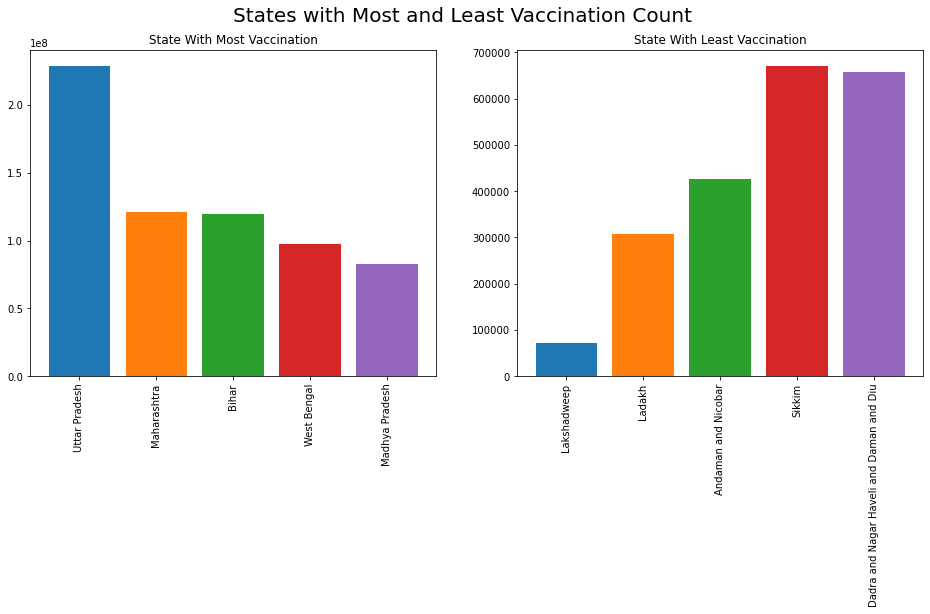

In [19]:
# States according to the doses
state_dose_most = df.sort_values(by='total_doses',ascending=False)['state'].values[:5]
state_popu_most = df.sort_values(by='total_doses',ascending=False)['population'].values[:5]
state_popu_least = df.sort_values(by='total_doses')['population'].values[:5]
state_dose_least = df.sort_values(by='total_doses')['state'].values[:5]
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.suptitle("States with Most and Least Vaccination Count",fontsize=20)
colr = sns.color_palette('tab10')
ax[0].set_title('State With Most Vaccination')
ax[0].bar(state_dose_most,state_popu_most,color=colr)
ax[1].set_title('State With Least Vaccination')
ax[1].bar(state_dose_least,state_popu_least,color=colr)
ax[1].set_xticklabels(state_dose_least,rotation=90)
ax[0].set_xticklabels(state_dose_most,rotation=90)
plt.show()

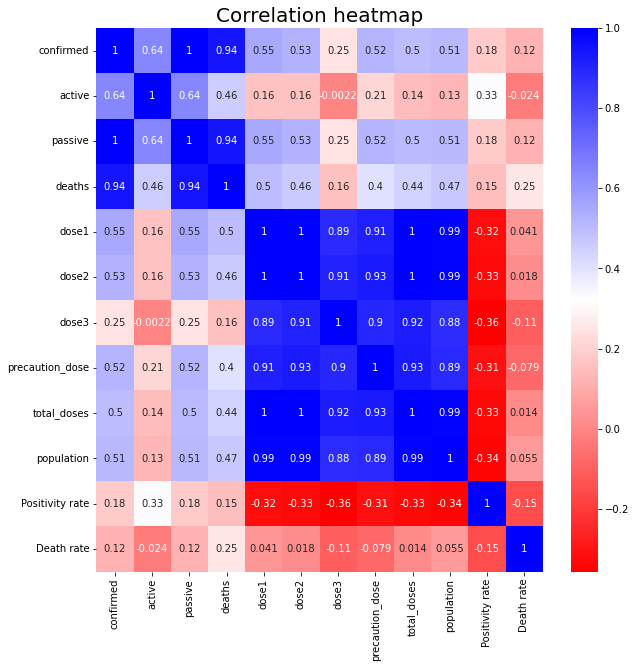

In [20]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='bwr_r',annot=True)
plt.title('Correlation heatmap',fontsize=20)
plt.show()

### Conclusions:
1. The State With the Dense Population have the Higher Confirmed Cases and Higher Death Ratio in Comparision to Others State
2. The State with Higher Population have the Higher Amount of the Vaccination
3. Vaccination of Dose1, Dose2 is Done Among the Approx 65% of Population
4. Vaccination of Dose3, Precaution Dose is Done Among the Only 20% of Population
5. Dose1 and Dose2 is Cighly Correlated to the Population